In [166]:
import numpy as np
import pandas as pd
import tensorflow as tf

import sklearn
from sklearn.preprocessing import StandardScaler
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

train = pd.read_csv("C:\\Users\\customer\\Desktop\\Dacon\\train.csv")

In [156]:
unique_labels = train['type'].unique()
label_dict =  {val:i for i, val in enumerate(unique_labels)}
i2lb = {v:k for k, v in label_dict.items()}
print(label_dict)
print(i2lb)

{'QSO': 0, 'STAR_RED_DWARF': 1, 'SERENDIPITY_BLUE': 2, 'STAR_BHB': 3, 'STAR_CATY_VAR': 4, 'SERENDIPITY_DISTANT': 5, 'GALAXY': 6, 'SPECTROPHOTO_STD': 7, 'REDDEN_STD': 8, 'ROSAT_D': 9, 'STAR_WHITE_DWARF': 10, 'SERENDIPITY_RED': 11, 'STAR_CARBON': 12, 'SERENDIPITY_FIRST': 13, 'STAR_BROWN_DWARF': 14, 'STAR_SUB_DWARF': 15, 'SKY': 16, 'SERENDIPITY_MANUAL': 17, 'STAR_PN': 18}
{0: 'QSO', 1: 'STAR_RED_DWARF', 2: 'SERENDIPITY_BLUE', 3: 'STAR_BHB', 4: 'STAR_CATY_VAR', 5: 'SERENDIPITY_DISTANT', 6: 'GALAXY', 7: 'SPECTROPHOTO_STD', 8: 'REDDEN_STD', 9: 'ROSAT_D', 10: 'STAR_WHITE_DWARF', 11: 'SERENDIPITY_RED', 12: 'STAR_CARBON', 13: 'SERENDIPITY_FIRST', 14: 'STAR_BROWN_DWARF', 15: 'STAR_SUB_DWARF', 16: 'SKY', 17: 'SERENDIPITY_MANUAL', 18: 'STAR_PN'}


In [3]:
scaler = StandardScaler()
labels = train['type']
train = train.drop(columns=['fiberID','type']) ### fiberID는 1000개의 categorical feature이며, 이 커널에서는 무시합니다.

In [4]:
_mat = scaler.fit_transform(train)
train = pd.DataFrame(_mat, columns = train.columns, index = train.index)
print(train)

              id  psfMag_u  psfMag_g  psfMag_r  psfMag_i  psfMag_z  \
0      -1.732042  0.002522  0.017736  0.022913  0.026865  0.028350   
1      -1.732025  0.002373  0.013079  0.017916  0.022808  0.022707   
2      -1.732008  0.002071 -0.012530 -0.013542 -0.011566 -0.008257   
3      -1.731990  0.002319  0.008782  0.012001  0.015437  0.014545   
4      -1.731973  0.002796  0.028203  0.024150  0.012532  0.005864   
...          ...       ...       ...       ...       ...       ...   
199986  1.731973  0.002305  0.011340  0.012975  0.016956  0.018557   
199987  1.731990  0.002697  0.026585  0.020991  0.018385  0.015615   
199988  1.732008  0.002556  0.020765  0.015178  0.003550 -0.002722   
199989  1.732025  0.002351  0.012134  0.012826  0.015007  0.015169   
199990  1.732042  0.002305  0.009309  0.015189  0.019868  0.018503   

        fiberMag_u  fiberMag_g  fiberMag_r  fiberMag_i  ...  petroMag_u  \
0         0.002812    0.003432    0.028019    0.026184  ...    0.000844   
1        

In [5]:
train_x = train
train_y =labels.replace(label_dict)

0                    QSO
1                    QSO
2                    QSO
3                    QSO
4         STAR_RED_DWARF
               ...      
199986               QSO
199987            GALAXY
199988    STAR_RED_DWARF
199989            GALAXY
199990               QSO
Name: type, Length: 199991, dtype: object
{'QSO': 0, 'STAR_RED_DWARF': 1, 'SERENDIPITY_BLUE': 2, 'STAR_BHB': 3, 'STAR_CATY_VAR': 4, 'SERENDIPITY_DISTANT': 5, 'GALAXY': 6, 'SPECTROPHOTO_STD': 7, 'REDDEN_STD': 8, 'ROSAT_D': 9, 'STAR_WHITE_DWARF': 10, 'SERENDIPITY_RED': 11, 'STAR_CARBON': 12, 'SERENDIPITY_FIRST': 13, 'STAR_BROWN_DWARF': 14, 'STAR_SUB_DWARF': 15, 'SKY': 16, 'SERENDIPITY_MANUAL': 17, 'STAR_PN': 18}


In [187]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.03)

In [188]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(len(train_x.columns)),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.BatchNormalization(axis=1),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.BatchNormalization(axis=1),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(19, activation = 'softmax')
])

In [189]:
model.compile(optimizer = optimizer,
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [190]:
history =model.fit(train_x,
         train_y,
         batch_size = 256,
         validation_split=0.1,
         epochs=30)

Train on 179991 samples, validate on 20000 samples
Epoch 1/30
179991/179991 [==============================] - 41s 230us/sample - loss: 0.8569 - accuracy: 0.7269 - val_loss: 2.4197 - val_accuracy: 0.4198
Epoch 2/30
179991/179991 [==============================] - 40s 224us/sample - loss: 0.6526 - accuracy: 0.7857 - val_loss: 2.6107 - val_accuracy: 0.0667
Epoch 3/30
179991/179991 [==============================] - 39s 219us/sample - loss: 0.6198 - accuracy: 0.7967 - val_loss: 2.7923 - val_accuracy: 0.0741
Epoch 4/30
179991/179991 [==============================] - 48s 265us/sample - loss: 0.6015 - accuracy: 0.8006 - val_loss: 2.7778 - val_accuracy: 0.2763
Epoch 5/30
179991/179991 [==============================] - 42s 231us/sample - loss: 0.5879 - accuracy: 0.8057 - val_loss: 2.8401 - val_accuracy: 0.0768
Epoch 6/30
179991/179991 [==============================] - 41s 227us/sample - loss: 0.5810 - accuracy: 0.8079 - val_loss: 2.6086 - val_accuracy: 0.3210
Epoch 7/30
179991/179991 [=====

In [191]:
y_vloss = history.history['val_loss']

y_acc = history.history['accuracy']

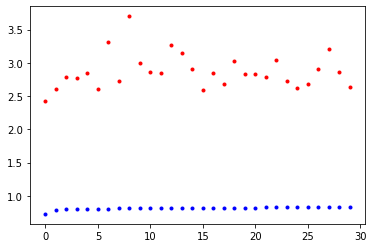

In [192]:
x_len = np.arange(len(y_acc))
plt.plot(x_len,y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()

In [184]:
test = pd.read_csv("C:\\Users\\customer\\Desktop\\Dacon\\test.csv").reset_index(drop=True)
test_ids = test['id']
test = test.drop(columns = ['fiberID'])

test = pd.DataFrame(scaler.fit_transform(test), columns = test.columns, index = test.index)

In [185]:
pred_mat = model.predict(test)

In [186]:
sample = pd.read_csv("C:\\Users\\customer\\Desktop\\Dacon\\sample_submission.csv")

submission = pd.DataFrame(pred_mat, index = test.index)
submission = submission.rename(columns=i2lb)
submission = pd.concat([test_ids, submission], axis=1)
submission = submission[sample.columns]
submission.to_csv("submission_ver_19.csv",index=False)